# Simple Linear Regression using Mini-Batch Stochastic Gradient Descent and Least Squares

The point of this workbook is to create a line and add fake noise, then solve for the true line using stochastic gradient descent.  This workbook was created prior to Coursera assignments to limit any guidance and to solve using own personal methods for extra learning.  

Algorithm for Stochastic Gradient Descent being used here is almost the same as the algorithm described in Coursera lecture except my convergence criteria just uses "early stopping" which is very easy to code and powerful tactic to control for overfitting.

Algorithm can be found in Coursera Machine Learning Specialization Classification course, Week7 "(Optional) Learning from batches of data" video.
<br>
<img src="https://github.com/yeamusic21/Coursera-Machine-Learning-Specialization-Extra-Assignments/blob/master/Classification/img/mini_batch_sgd_algorithm.PNG?raw=true">

Also here notice that we're using gradient descent for linear regression and not gradient ascent for logistic regression.   

## Part 1:

## Create Some Fake Data to Fit

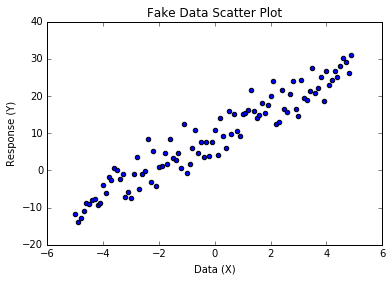

In [9]:
#### CREATE FAKE DATA

# imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# simulate some data
column1 = np.repeat(1, 100)
column2 = np.arange(-5,5,0.1)
X = np.matrix([column1,column2])
X = X.transpose()
# make up some parameters
B = np.matrix(np.array([9.345,3.961]))
B = B.transpose()
# create some fake noise
e = np.matrix(np.random.normal(0, 3, 100))
e = e.transpose()
# finally, create fake response data
Y = X*B + e

# plot our fake data to make sure it looks as we would expect (linear relationship with noise)
plt.scatter(X[:,1], Y)
plt.title('Fake Data Scatter Plot')
plt.xlabel("Data (X)")
plt.ylabel("Response (Y)")
plt.show()

## Solve for coefficients using Mini-Batch Stochastic Gradient Descent & batch size = 10

The estimated Coefficients are:
[[ 8.09734011]
 [ 3.87995974]]
The true Coefficients are:
[[ 9.345]
 [ 3.961]]


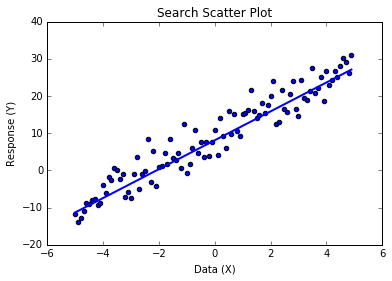

total iterations to convergence:


1010

In [51]:
#### SOLVE FOR COEFFICIENTS USING GRADIENT DESCENT & LEAST SQUARES

# initialize coefficients 
Bhat = np.matrix(np.array([1.0,1.0]))
Bhat = Bhat.transpose()
# initialize convergence flag
convergence_flag = 0
# initalize iteration counter
iterations = 0
# save RSS history
history = []

while convergence_flag == 0:
    for i in range(1,11):
        iterations = iterations + 1
        start = i*10-10
        end = i*10
        # update coefficients
        # intercept
        residuals = Y[start:end]-(X[start:end,]*Bhat)
        residual_sum = residuals.sum()
        Bhat[0,] = Bhat[0,:] + 2*(0.0001)*(residual_sum)
        # slope
        residual_sum = residuals.transpose()*X[start:end,1]
        Bhat[1,] = Bhat[1,:] + 2*(0.0001)*(residual_sum)    
        # compute RSS   
        #residuals = Y[start:end]-(X[start:end,]*Bhat)
        residuals = Y-(X*Bhat)
        RS = np.square(residuals)
        RSS = RS.sum()
        # save RSS history
        history.append(RSS)
    # check for convergence
    if iterations>1000:
        convergence_flag = 1

# print estimated coefficients     
print "The estimated Coefficients are:"
print Bhat
# print true coefficients
print "The true Coefficients are:"
print B

plt.scatter(X[:,1], Y)
plt.plot(X[:,1], X*Bhat, linewidth=2.0)
plt.title('Search Scatter Plot')
plt.xlabel("Data (X)")
plt.ylabel("Response (Y)")
plt.show()

print "total iterations to convergence:"
iterations

## Show RSS history over time

The point of this is to see how stochastic GD doesn't always move is the right direction, but generally it does.

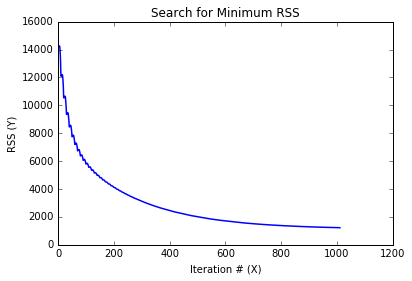

In [55]:
plt.plot(range(1,iterations+1),history,linewidth=1.5)
plt.title('Search for Minimum RSS')
plt.xlabel("Iteration # (X)")
plt.ylabel("RSS (Y)")
plt.show()

In [56]:
history[990:1010]

[1235.9529153373435,
 1234.6535149462372,
 1234.2011568858086,
 1233.4960576940493,
 1233.7534691963285,
 1233.4125944402269,
 1232.0046381127468,
 1231.5516122026904,
 1231.5917494604591,
 1230.7987516450214,
 1231.0774345191755,
 1229.8094981331362,
 1229.3735043808215,
 1228.6903525869734,
 1228.951096485323,
 1228.6272482928982,
 1227.2590274453325,
 1226.8269251893528,
 1226.8782672958914,
 1226.1083798560662]

## Part 2:

## Solve for coefficients using MIni-Batch Stochastic Gradient Descent & batch size = 5

The estimated Coefficients are:
[[ 10.08461244]
 [  4.15241953]]
The true Coefficients are:
[[ 9.345]
 [ 3.961]]


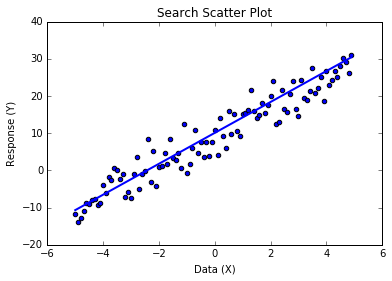

total iterations to convergence:


50005

In [63]:
#### SOLVE FOR COEFFICIENTS USING GRADIENT DESCENT & LEAST SQUARES

# initialize coefficients 
Bhat = np.matrix(np.array([1.0,1.0]))
Bhat = Bhat.transpose()
# initialize convergence flag
convergence_flag = 0
# initalize iteration counter
iterations = 0
# save RSS history
history = []
# batch size
batch = 5

while convergence_flag == 0:
    for i in range(1,batch+1):
        iterations = iterations + 1
        start = i*batch-batch
        end = i*batch
        # update coefficients
        # intercept
        residuals = Y[start:end]-(X[start:end,]*Bhat)
        residual_sum = residuals.sum()
        Bhat[0,] = Bhat[0,:] + 2*(0.0001)*(residual_sum)
        # slope
        residual_sum = residuals.transpose()*X[start:end,1]
        Bhat[1,] = Bhat[1,:] + 2*(0.0001)*(residual_sum)    
        # compute RSS   
        #residuals = Y[start:end]-(X[start:end,]*Bhat)
        residuals = Y-(X*Bhat)
        RS = np.square(residuals)
        RSS = RS.sum()
        # save RSS history
        history.append(RSS)
    # check for convergence
    if iterations>50000:
        convergence_flag = 1

# print estimated coefficients     
print "The estimated Coefficients are:"
print Bhat
# print true coefficients
print "The true Coefficients are:"
print B

plt.scatter(X[:,1], Y)
plt.plot(X[:,1], X*Bhat, linewidth=2.0)
plt.title('Search Scatter Plot')
plt.xlabel("Data (X)")
plt.ylabel("Response (Y)")
plt.show()

print "total iterations to convergence:"
iterations

## Show RSS history over time

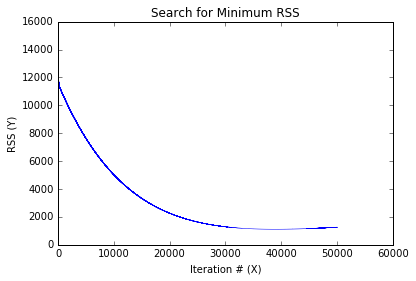

In [64]:
plt.plot(range(1,iterations+1),history,linewidth=0.5)
plt.title('Search for Minimum RSS')
plt.xlabel("Iteration # (X)")
plt.ylabel("RSS (Y)")
plt.show()

In [66]:
history[49990:50010]

[1261.318898238156,
 1262.5703363886596,
 1257.9505721664948,
 1257.2362325613353,
 1257.9597595601226,
 1261.428058246189,
 1262.6798330431229,
 1258.0585932158299,
 1257.3440902751984,
 1258.0679683889343,
 1261.5372407847383,
 1262.7893521326569,
 1258.1666369551358,
 1257.451970755845,
 1258.1762000003107]

We can see that batch size of 10 converges faster than mini batch size of 5.  We can only imagine batch size of 1 would take even longer.  "Picking the right batch size make a big difference".  We can see this is true here.